# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Joshua Garcia - A15379185
- Bo Su -
- Sarai Santos - A13313500

<a id='research_question'></a>
# Research Question

How does the income level county-level wide in the U.S. affect the likelihood of contracting the Covid-19 virus
and it's overall lethality? 

<a id='background'></a>

## Background & Prior Work

**NEEDS TO BE UPDATED**

As we look back on our research question, we found that some of our group members are from the U.S. and live in the State of California. This research question was interesting to us because we live in the U.S. and wanted to investigate how the rest of the U.S. was impacted and what lead to that impact. Whether some of us, or our family members contracted the Covid virus, we were drawn to analyze how Covid spread and if it was led to spread by other more subtle factors such as income.

Other work that has been done on this subject has been previous research on how child immune systems are affected by the income level of their families in the US. We found this as relevant information because their findings brought to our attention that [3]income level does have an impact on the immune system of a person from a young age. From the CDC website we found that they recommend people to keep themselves clean and to use cleaning products to sanitize themselves, and the things they interact with to avoid contracting diseases and harmful bacteria[1]. However, those products can be quite costly, and thus the expense can be too costly for many of the minorities in the areas provided by the U.S. Census which highlight the income levels by county[2].

With this data in mind, we want to look deeper into how income factors into a person's resistance to a virus and what other effects come into play down the line.

References:

1) CDC Website https://www.cdc.gov/

2) US Census website https://www.census.gov/programs-surveys/acs/news/updates/2019.html

3) Research article https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3477379/

# Hypothesis


**NEEDS TO BE UPDATED**

For our main hypothesis, we predict that the level of income does have an effect on the Covid-19 infection rate. Our belief is that there would be a negative correlation between the income and infection rate. That is, households with higher income level can be better prepared for the crisis.
We also believe that there is a negative correlation between the number of casualties, and the income level of a county. Another factor that we believe will play a heavy role is the number of ICU beds available will be in direct correlation to the income level of that county.

# Dataset(s)

**NEEDS TO BE UPDATED**

Explain what the ideal dataset you would want to answer this question. What variables? The ideal data set we would need to answer this question would be a data set that contains the income levels of the U.S. citizens by county, as well as insurance coverage, and a data set with Covid Cases by county as well as ICU bed availability.

Our variables would be Income level, County, Time, Covid cases over time.

How many observations? For covid cases, we have data for each day, so it is ~365 observations, for income level, United States Census Bureau have data every year.

Who/what/how would these data be collected? These data would be downloaded from the internet Income level data is collected by United States Census Bureau Covid daily cases data is collected by Johns Hopkins Corona virus Resource Center or the CDC website.

How would these data be stored/organized? We would prefer the data to be stored in a .csv format if possible.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py 
import plotly.graph_objs as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.figure_factory as ff
from PIL import Image
import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'en_US.UTF-8'

# Data Cleaning

We found that our best ideal dataset would be one that contained its data stored by county rather than state. We found that all of our data sets had contained more information than we needed for the scope of this project so we decided to focus on one time frame (of a year) rather than attempting to do daily comparisons. We also decided to do a county level data set rather than an individual case bases since that too would be out of scope for the terms of this project so we choose to go with a more generalized data set that contains county level data. We would need to clean out the daily recorded cases in the Covid-19 Data sets and get the final count of recorded cases after 1 year. We also needed to clean our income data set since that data set contained much more specific individual data that we decided would be too specific for the research question we are trying to answer.

In [2]:
#Contains the number of county-level confirmed Covid-19 cases in the U.S.
Cases_contracted = pd.read_csv('Datasets/covid_confirmed_usafacts.csv')
Cases_contracted

countyFIPS            County Name State  StateFIPS  2020-01-22  \
0              0  Statewide Unallocated    AL          1           0   
1           1001        Autauga County     AL          1           0   
2           1003        Baldwin County     AL          1           0   
3           1005        Barbour County     AL          1           0   
4           1007           Bibb County     AL          1           0   
...          ...                    ...   ...        ...         ...   
3187       56037     Sweetwater County     WY         56           0   
3188       56039          Teton County     WY         56           0   
3189       56041          Uinta County     WY         56           0   
3190       56043       Washakie County     WY         56           0   
3191       56045         Weston County     WY         56           0   

      2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  \
0              0           0           0           0           0  ...   
1              0           0           0           0           0  ...   
2              0           0           0           0           0  ...   
3              0           0           0           0           0  ...   
4              0           0           0           0           0  ...   
...          ...         ...         ...         ...         ...  ...   
3187           0           0           0           0           0  ...   
3188           0           0           0           0           0  ...   
3189           0           0           0           0           0  ...   
3190           0           0           0           0           0  ...   
3191           0           0           0           0           0  ...   

      2021-01-29  2021-01-30  2021-01-31  2021-02-01  2021-02-02  2021-02-03  \
0              0           0           0           0           0           0   
1           5596        5596        5669        5683        5723        5753   
2          17922       17922       18126       18211       18344       18418   
3           1931        1931        1951        1956        1966        1981   
4           2284        2284        2307        2309        2319        2321   
...          ...         ...         ...         ...         ...         ...   
3187        3464        3472        3486        3503        3510        3519   
3188        3078        3078        3116        3146        3151        3161   
3189        1959        1960        1963        1968        1975        1981   
3190         864         864         866         866         868         869   
3191         610         610         609         609         611         612   

      2021-02-04  2021-02-05  2021-02-06  2021-02-07  
0              0           0           0           0  
1           5811        5824        5856        5869  
2          18494       18568       18668       18723  
3           1989        1994        2002        2008  
4           2327        2331        2334        2339  
...          ...         ...         ...         ...  
3187        3529        3533        3537        3537  
3188        3199        3219        3233        3238  
3189        1984        1984        1984        1984  
3190         870         870         870         870  
3191         613         613         614         616  

[3192 rows x 387 columns]

In [3]:
#Contains the number of county-level confirmed Covid-19 deaths in the U.S.
confirmed_deaths = pd.read_csv('Datasets/covid_deaths_usafacts.csv')
confirmed_deaths

countyFIPS            County Name State  StateFIPS  2020-01-22  \
0              0  Statewide Unallocated    AL          1           0   
1           1001        Autauga County     AL          1           0   
2           1003        Baldwin County     AL          1           0   
3           1005        Barbour County     AL          1           0   
4           1007           Bibb County     AL          1           0   
...          ...                    ...   ...        ...         ...   
3187       56037     Sweetwater County     WY         56           0   
3188       56039          Teton County     WY         56           0   
3189       56041          Uinta County     WY         56           0   
3190       56043       Washakie County     WY         56           0   
3191       56045         Weston County     WY         56           0   

      2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  \
0              0           0           0           0           0  ...   
1              0           0           0           0           0  ...   
2              0           0           0           0           0  ...   
3              0           0           0           0           0  ...   
4              0           0           0           0           0  ...   
...          ...         ...         ...         ...         ...  ...   
3187           0           0           0           0           0  ...   
3188           0           0           0           0           0  ...   
3189           0           0           0           0           0  ...   
3190           0           0           0           0           0  ...   
3191           0           0           0           0           0  ...   

      2021-01-29  2021-01-30  2021-01-31  2021-02-01  2021-02-02  2021-02-03  \
0              0           0           0           0           0           0   
1             69          69          69          69          70          71   
2            224         224         224         224         228         228   
3             40          40          40          40          40          42   
4             51          51          52          52          52          52   
...          ...         ...         ...         ...         ...         ...   
3187          32          32          32          32          33          33   
3188           6           6           6           6           7           7   
3189          12          12          12          12          12          12   
3190          25          25          25          25          26          26   
3191           4           4           4           4           5           5   

      2021-02-04  2021-02-05  2021-02-06  2021-02-07  
0              0           0           0           0  
1             74          76          77          77  
2            233         234         234         234  
3             43          44          45          45  
4             52          52          53          53  
...          ...         ...         ...         ...  
3187          33          33          33          33  
3188           7           7           7           7  
3189          12          12          12          12  
3190          26          26          26          26  
3191           5           5           5           5  

[3192 rows x 387 columns]

In [4]:
#Contains the county-level income levels in the U.S.
county_income = pd.read_csv('Datasets/Income.csv')
county_income

Table with column headers in rows 3 and 4        Unnamed: 1  \
0     2019 Poverty and Median Household Income Estim...               NaN   
1                                Geographic Information               NaN   
2                                       State FIPS Code  County FIPS Code   
3                                                    00               000   
4                                                    01               000   
...                                                 ...               ...   
3192                                                 56               037   
3193                                                 56               039   
3194                                                 56               041   
3195                                                 56               043   
3196                                                 56               045   

       Unnamed: 2         Unnamed: 3                  Unnamed: 4  \
0             NaN                NaN                         NaN   
1             NaN                NaN                    All Ages   
2     Postal Code               Name  Poverty Estimate, All Ages   
3              US      United States                  39,490,096   
4              AL            Alabama                     747,478   
...           ...                ...                         ...   
3192           WY  Sweetwater County                       3,453   
3193           WY       Teton County                       1,396   
3194           WY       Uinta County                       1,699   
3195           WY    Washakie County                         845   
3196           WY      Weston County                         692   

              Unnamed: 5          Unnamed: 6                 Unnamed: 7  \
0                    NaN                 NaN                        NaN   
1                    NaN                 NaN                        NaN   
2     90% CI Lower Bound  90% CI Upper Bound  Poverty Percent, All Ages   
3             39,248,096          39,732,096                       12.3   
4                730,491             764,465                       15.6   
...                  ...                 ...                        ...   
3192               2,743               4,163                        8.3   
3193               1,073               1,719                        6.0   
3194               1,264               2,134                        8.5   
3195                 626               1,064                       11.1   
3196                 523                 861                       10.5   

              Unnamed: 8          Unnamed: 9  ...         Unnamed: 21  \
0                    NaN                 NaN  ...                 NaN   
1                    NaN                 NaN  ...                 NaN   
2     90% CI Lower Bound  90% CI Upper Bound  ...  90% CI Upper Bound   
3                   12.2                12.4  ...                16.0   
4                   15.2                16.0  ...                21.6   
...                  ...                 ...  ...                 ...   
3192                 6.6                10.0  ...                11.1   
3193                 4.6                 7.4  ...                 6.7   
3194                 6.3                10.7  ...                11.1   
3195                 8.2                14.0  ...                17.4   
3196                 7.9                13.1  ...                16.7   

                  Unnamed: 22         Unnamed: 23         Unnamed: 24  \
0                         NaN                 NaN                 NaN   
1     Median Household Income                 NaN                 NaN   
2     Median Household Income  90% CI Lower Bound  90% CI Upper Bound   
3                      65,712              65,594              65,830   
4                      51,771              51,179              52,363   
...                       ...                 ...       

In [5]:
population = pd.read_excel('Datasets/co-est2019-annres.xlsx')
population

table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)  \
0     Annual Estimates of the Resident Population fo...                                                            
1                                       Geographic Area                                                            
2                                                   NaN                                                            
3                                         United States                                                            
4                              .Autauga County, Alabama                                                            
...                                                 ...                                                            
3147  Note: The 6,222 people in Bedford city, Virgin...                                                            
3148                                Suggested Citation:                                                            
3149  Annual Estimates of the Resident Population fo...                                                            
3150    Source: U.S. Census Bureau, Population Division                                                            
3151                           Release Date: March 2020                                                            

               Unnamed: 1      Unnamed: 2                          Unnamed: 3  \
0                     NaN             NaN                                 NaN   
1     2010-04-01 00:00:00             NaN  Population Estimate (as of July 1)   
2                  Census  Estimates Base                                2010   
3               308745538       308758105                           309321666   
4                   54571           54597                               54773   
...                   ...             ...                                 ...   
3147                  NaN             NaN                                 NaN   
3148                  NaN             NaN                                 NaN   
3149                  NaN             NaN                                 NaN   
3150                  NaN             NaN                                 NaN   
3151                  NaN             NaN                                 NaN   

       Unnamed: 4   Unnamed: 5   Unnamed: 6   Unnamed: 7   Unnamed: 8  \
0             NaN          NaN          NaN          NaN          NaN   
1             NaN          NaN          NaN          NaN          NaN   
2          2011.0       2012.0       2013.0       2014.0       2015.0   
3     311556874.0  313830990.0  315993715.0  318301008.0  320635163.0   
4         55227.0      54954.0      54727.0      54893.0      54864.0   
...           ...          ...          ...          ...          ...   
3147          NaN          NaN          NaN          NaN          NaN   
3148          NaN          NaN          NaN          NaN          NaN   
3149          NaN          NaN          NaN          NaN          NaN   
3150          NaN          NaN          NaN          NaN          NaN   
3151          NaN          NaN          NaN          NaN          NaN   

       Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  
0             NaN          NaN          NaN          NaN  
1             NaN          NaN          NaN          NaN  
2          2016.0       2017.0       2018.0       2019.0  
3     322941311.0  324985539.0  326687501.0  328239523.0  
4         55243.0      55390.0      55533.0      55869.0  
...           ...          ...          ...          ...  
3147          NaN          NaN          NaN          NaN  
3148          NaN          NaN          NaN          NaN  
3149          NaN          NaN          NaN          NaN  
3150          NaN          NaN          NaN          NaN  
3151          NaN          NaN          NaN          NaN  

[3152 rows x 13 columns]

In [6]:
StatePop = pd.read_csv('Datasets/SCPRC-EST2019.csv')
StatePop

SUMLEV REGION DIVISION  STATE                      NAME  POPESTIMATE2019  \
0       10      0        0      0             United States        328239523   
1       40      3        6      1                   Alabama          4903185   
2       40      4        9      2                    Alaska           731545   
3       40      4        8      4                   Arizona          7278717   
4       40      3        7      5                  Arkansas          3017804   
5       40      4        9      6                California         39512223   
6       40      4        8      8                  Colorado          5758736   
7       40      1        1      9               Connecticut          3565287   
8       40      3        5     10                  Delaware           973764   
9       40      3        5     11      District of Columbia           705749   
10      40      3        5     12                   Florida         21477737   
11      40      3        5     13                   Georgia         10617423   
12      40      4        9     15                    Hawaii          1415872   
13      40      4        8     16                     Idaho          1787065   
14      40      2        3     17                  Illinois         12671821   
15      40      2        3     18                   Indiana          6732219   
16      40      2        4     19                      Iowa          3155070   
17      40      2        4     20                    Kansas          2913314   
18      40      3        6     21                  Kentucky          4467673   
19      40      3        7     22                 Louisiana          4648794   
20      40      1        1     23                     Maine          1344212   
21      40      3        5     24                  Maryland          6045680   
22      40      1        1     25             Massachusetts          6892503   
23      40      2        3     26                  Michigan          9986857   
24      40      2        4     27                 Minnesota          5639632   
25      40      3        6     28               Mississippi          2976149   
26      40      2        4     29                  Missouri          6137428   
27      40      4        8     30                   Montana          1068778   
28      40      2        4     31                  Nebraska          1934408   
29      40      4        8     32                    Nevada          3080156   
30      40      1        1     33             New Hampshire          1359711   
31      40      1        2     34                New Jersey          8882190   
32      40      4        8     35                New Mexico          2096829   
33      40      1        2     36                  New York         19453561   
34      40      3        5     37            North Carolina         10488084   
35      40      2        4     38              North Dakota           762062   
36      40      2        3     39                      Ohio         11689100   
37      40      3        7     40                  Oklahoma          3956971   
38      40      4        9     41                    Oregon          4217737   
39      40      1        2     42              Pennsylvania         12801989   
40      40      1        1     44              Rhode Island          1059361   
41      40      3        5     45            South Carolina          5148714   
42      40      2        4     46              South Dakota           884659   
43      40      3        6     47                 Tennessee          6829174   
44      40      3        7     48                     Texas         28995881   
45      40      4        8     49                      Utah          3205958   
46      40      1        1     50                   Vermont           623989   
47      40      3        5     51                  Virginia          8535519   
48      40      4        9     53                Washington          7614893   
49  

In [7]:
#We call Cases_confirmed.head() to see what is inside of our data set.
Cases_contracted.head()

countyFIPS            County Name State  StateFIPS  2020-01-22  2020-01-23  \
0           0  Statewide Unallocated    AL          1           0           0   
1        1001        Autauga County     AL          1           0           0   
2        1003        Baldwin County     AL          1           0           0   
3        1005        Barbour County     AL          1           0           0   
4        1007           Bibb County     AL          1           0           0   

   2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  2021-01-29  \
0           0           0           0           0  ...           0   
1           0           0           0           0  ...        5596   
2           0           0           0           0  ...       17922   
3           0           0           0           0  ...        1931   
4           0           0           0           0  ...        2284   

   2021-01-30  2021-01-31  2021-02-01  2021-02-02  2021-02-03  2021-02-04  \
0           0           0           0           0           0           0   
1        5596        5669        5683        5723        5753        5811   
2       17922       18126       18211       18344       18418       18494   
3        1931        1951        1956        1966        1981        1989   
4        2284        2307        2309        2319        2321        2327   

   2021-02-05  2021-02-06  2021-02-07  
0           0           0           0  
1        5824        5856        5869  
2       18568       18668       18723  
3        1994        2002        2008  
4        2331        2334        2339  

[5 rows x 387 columns]

In [8]:
#Cleaning the confirmed cases data in the US
#First we select the columns of data that we plan to use
states = Cases_contracted[["County Name", "State", "2021-02-07"]]

In [9]:
#Next we want to rename our columns
states = states.rename(columns={'County Name': "county", '2021-02-07': 'Total Cases'})

In [10]:
#We notice that there is a data anomaly for the total number of states, in this Data set they consider the district of columbia
#a state so we have to fix that by assigning it to its actual state
states = states.replace(to_replace='DC', value = 'MA')

In [11]:
#We add a column that holds the state Totals for each state
states['State Total cases'] = 0

In [12]:
#Finally we want to add up all of the cases in each county per state and add it to the column
AL_Total = states.loc[states['State'] == 'AL', 'Total Cases'].sum()
states.iloc[[0], [3]] = AL_Total
AK_Total = states.loc[states['State'] == 'AK', 'Total Cases'].sum()
states.iloc[[68], [3]]= AK_Total
AZ_Total = states.loc[states['State'] == 'AZ', 'Total Cases'].sum()
states.iloc[[98], [3]] = AZ_Total
AR_Total = states.loc[states['State'] == 'AR', 'Total Cases'].sum()
states.iloc[[114], [3]] = AR_Total
CA_Total = states.loc[states['State'] == 'CA', 'Total Cases'].sum()
states.iloc[[190], [3]] = CA_Total
CO_Total = states.loc[states['State'] == 'CO', 'Total Cases'].sum()
states.iloc[[249], [3]] = CO_Total
CT_Total = states.loc[states['State'] == 'CT', 'Total Cases'].sum()
states.iloc[[314], [3]] = CT_Total
DW_Total = states.loc[states['State'] == 'DE', 'Total Cases'].sum()
states.iloc[[323], [3]] = DW_Total
FL_Total = states.loc[states['State'] == 'FL', 'Total Cases'].sum()
states.iloc[[328], [3]] = FL_Total
GA_Total = states.loc[states['State'] == 'GA', 'Total Cases'].sum()
states.iloc[[396], [3]] = GA_Total
HI_Total = states.loc[states['State'] == 'HI', 'Total Cases'].sum()
states.iloc[[556], [3]] = HI_Total
ID_Total = states.loc[states['State'] == 'ID', 'Total Cases'].sum()
states.iloc[[562], [3]] = ID_Total
IL_Total = states.loc[states['State'] == 'IL', 'Total Cases'].sum()
states.iloc[[607], [3]] = IL_Total
IN_Total = states.loc[states['State'] == 'IN', 'Total Cases'].sum()
states.iloc[[710], [3]] = IN_Total
IA_Total = states.loc[states['State'] == 'IA', 'Total Cases'].sum()
states.iloc[[803], [3]] = IA_Total
KS_Total = states.loc[states['State'] == 'KS', 'Total Cases'].sum()
states.iloc[[903], [3]] = KS_Total
KY_Total = states.loc[states['State'] == 'KY', 'Total Cases'].sum()
states.iloc[[1009], [3]] = KY_Total
LA_Total = states.loc[states['State'] == 'LA', 'Total Cases'].sum()
states.iloc[[1130], [3]] = LA_Total
ME_Total = states.loc[states['State'] == 'ME', 'Total Cases'].sum()
states.iloc[[1195], [3]] = ME_Total
MD_Total = states.loc[states['State'] == 'MD', 'Total Cases'].sum()
states.iloc[[1212], [3]] = MD_Total
MA_Total = states.loc[states['State'] == 'MA', 'Total Cases'].sum()
states.iloc[[1237], [3]] = MA_Total
MI_Total = states.loc[states['State'] == 'MI', 'Total Cases'].sum()
states.iloc[[1252], [3]] = LA_Total
MN_Total = states.loc[states['State'] == 'MN', 'Total Cases'].sum()
states.iloc[[1336], [3]] = MN_Total
MS_Total = states.loc[states['State'] == 'MS', 'Total Cases'].sum()
states.iloc[[1424], [3]] = MS_Total
MO_Total = states.loc[states['State'] == 'MO', 'Total Cases'].sum()
states.iloc[[1507], [3]] = MO_Total
MT_Total = states.loc[states['State'] == 'MT', 'Total Cases'].sum()
states.iloc[[1623], [3]] = MT_Total
NE_Total = states.loc[states['State'] == 'NE', 'Total Cases'].sum()
states.iloc[[1680], [3]] = NE_Total
NV_Total = states.loc[states['State'] == 'NV', 'Total Cases'].sum()
states.iloc[[1774], [3]] = NV_Total
NH_Total = states.loc[states['State'] == 'NH', 'Total Cases'].sum()
states.iloc[[1792], [3]] = NH_Total
NJ_Total = states.loc[states['State'] == 'NJ', 'Total Cases'].sum()
states.iloc[[1803], [3]] = NJ_Total
NM_Total = states.loc[states['State'] == 'NM', 'Total Cases'].sum()
states.iloc[[1825], [3]] = NM_Total
NY_Total = states.loc[states['State'] == 'NY', 'Total Cases'].sum()
states.iloc[[1859], [3]] = NY_Total
NC_Total = states.loc[states['State'] == 'NC', 'Total Cases'].sum()
states.iloc[[1922], [3]] = NC_Total
ND_Total = states.loc[states['State'] == 'ND', 'Total Cases'].sum()
states.iloc[[2023], [3]] = ND_Total
OH_Total = states.loc[states['State'] == 'OH', 'Total Cases'].sum()
states.iloc[[2077], [3]] = OH_Total
OK_Total = states.loc[states['State'] == 'OK', 'Total Cases'].sum()
states.iloc[[2166], [3]] = OK_Total
OR_Total = states.loc[states['State'] == 'OR', 'Total Cases'].sum()
states.iloc[[2244], [3]] = OR_Total
PA_Total = states.loc[states['State'] == 'PA', 'Total Cases'].sum()
states.iloc[[2281], [3]] = PA_Total
RI_Total = states.loc[states['State'] == 'RI', 'Total Cases'].sum()
states.iloc[[2349], [3]] = RI_Total
SC_Total = states.loc[states['State'] == 'SC', 'Total Cases'].sum()
states.iloc[[2355], [3]] = SC_Total
SD_Total = states.loc[states['State'] == 'SD', 'Total Cases'].sum()
states.iloc[[2402], [3]] = SD_Total
TN_Total = states.loc[states['State'] == 'TN', 'Total Cases'].sum()
states.iloc[[2469], [3]] = TN_Total
TX_Total = states.loc[states['State'] == 'TX', 'Total Cases'].sum()
states.iloc[[2565], [3]] = TX_Total
UT_Total = states.loc[states['State'] == 'UT', 'Total Cases'].sum()
states.iloc[[2820], [3]] = UT_Total
VT_Total = states.loc[states['State'] == 'VT', 'Total Cases'].sum()
states.iloc[[2850], [3]] = VT_Total
VA_Total = states.loc[states['State'] == 'VA', 'Total Cases'].sum()
states.iloc[[2865], [3]] = VA_Total
WA_Total = states.loc[states['State'] == 'WA', 'Total Cases'].sum()
states.iloc[[2999], [3]] = WA_Total
WV_Total = states.loc[states['State'] == 'WV', 'Total Cases'].sum()
states.iloc[[3039], [3]] = WV_Total
WI_Total = states.loc[states['State'] == 'WI', 'Total Cases'].sum()
states.iloc[[3095], [3]] = WI_Total
WY_Total = states.loc[states['State'] == 'WY', 'Total Cases'].sum()
states.iloc[[3168], [3]] = WY_Total

In [13]:
#We call states one more time to see what is inside our now cleaned data
states

county State  Total Cases  State Total cases
0     Statewide Unallocated    AL            0             472432
1           Autauga County     AL         5869                  0
2           Baldwin County     AL        18723                  0
3           Barbour County     AL         2008                  0
4              Bibb County     AL         2339                  0
...                     ...   ...          ...                ...
3187     Sweetwater County     WY         3537                  0
3188          Teton County     WY         3238                  0
3189          Uinta County     WY         1984                  0
3190       Washakie County     WY          870                  0
3191         Weston County     WY          616                  0

[3192 rows x 4 columns]

In [14]:
#We call confirmed_deaths.head() to see what is inside of our data set.
confirmed_deaths.head()

countyFIPS            County Name State  StateFIPS  2020-01-22  2020-01-23  \
0           0  Statewide Unallocated    AL          1           0           0   
1        1001        Autauga County     AL          1           0           0   
2        1003        Baldwin County     AL          1           0           0   
3        1005        Barbour County     AL          1           0           0   
4        1007           Bibb County     AL          1           0           0   

   2020-01-24  2020-01-25  2020-01-26  2020-01-27  ...  2021-01-29  \
0           0           0           0           0  ...           0   
1           0           0           0           0  ...          69   
2           0           0           0           0  ...         224   
3           0           0           0           0  ...          40   
4           0           0           0           0  ...          51   

   2021-01-30  2021-01-31  2021-02-01  2021-02-02  2021-02-03  2021-02-04  \
0           0           0           0           0           0           0   
1          69          69          69          70          71          74   
2         224         224         224         228         228         233   
3          40          40          40          40          42          43   
4          51          52          52          52          52          52   

   2021-02-05  2021-02-06  2021-02-07  
0           0           0           0  
1          76          77          77  
2         234         234         234  
3          44          45          45  
4          52          53          53  

[5 rows x 387 columns]

In [15]:
#Cleaning the confirmed deaths data in the US
#First we select the columns of data that we plan to use
D2states = confirmed_deaths[['countyFIPS','County Name', 'State', '2021-02-07']]

In [16]:
#Next we want to rename our columns
D2states = D2states.rename(columns={'County Name': 'County Name', 'State': 'state' , '2021-02-07': 'Total Deaths'})

In [17]:
#We notice that there is a data anomaly for the total number of states, in this Data set they consider the district of columbia
#a state so we have to fix that by assigning it to its actual state
D2states = D2states.replace(to_replace='DC', value = 'MA')

In [18]:
#We add a column that holds the state Totals for each state
D2states['State Total Deaths'] = 0

In [19]:
#Finally we want to add up all of the cases in each county per state and add it to the column
AL_Total = D2states.loc[D2states['state'] == 'AL', 'Total Deaths'].sum()
D2states.iloc[[0], [3]] = AL_Total
AK_Total = D2states.loc[D2states['state'] == 'AK', 'Total Deaths'].sum()
D2states.iloc[[68], [3]]= AK_Total
AZ_Total = D2states.loc[D2states['state'] == 'AZ', 'Total Deaths'].sum()
D2states.iloc[[98], [3]] = AZ_Total
AR_Total = D2states.loc[D2states['state'] == 'AR', 'Total Deaths'].sum()
D2states.iloc[[114], [3]] = AR_Total
CA_Total = D2states.loc[D2states['state'] == 'CA', 'Total Deaths'].sum()
D2states.iloc[[190], [3]] = CA_Total
CO_Total = D2states.loc[D2states['state'] == 'CO', 'Total Deaths'].sum()
D2states.iloc[[249], [3]] = CO_Total
CT_Total = D2states.loc[D2states['state'] == 'CT', 'Total Deaths'].sum()
D2states.iloc[[314], [3]] = CT_Total
DW_Total = D2states.loc[D2states['state'] == 'DE', 'Total Deaths'].sum()
D2states.iloc[[323], [3]] = DW_Total
FL_Total = D2states.loc[D2states['state'] == 'FL', 'Total Deaths'].sum()
D2states.iloc[[328], [3]] = FL_Total
GA_Total = D2states.loc[D2states['state'] == 'GA', 'Total Deaths'].sum()
D2states.iloc[[396], [3]] = GA_Total
HI_Total = D2states.loc[D2states['state'] == 'HI', 'Total Deaths'].sum()
D2states.iloc[[556], [3]] = HI_Total
ID_Total = D2states.loc[D2states['state'] == 'ID', 'Total Deaths'].sum()
D2states.iloc[[562], [3]] = ID_Total
IL_Total = D2states.loc[D2states['state'] == 'IL', 'Total Deaths'].sum()
D2states.iloc[[607], [3]] = IL_Total
IN_Total = D2states.loc[D2states['state'] == 'IN', 'Total Deaths'].sum()
D2states.iloc[[710], [3]] = IN_Total
IA_Total = D2states.loc[D2states['state'] == 'IA', 'Total Deaths'].sum()
D2states.iloc[[803], [3]] = IA_Total
KS_Total = D2states.loc[D2states['state'] == 'KS', 'Total Deaths'].sum()
D2states.iloc[[903], [3]] = KS_Total
KY_Total = D2states.loc[D2states['state'] == 'KY', 'Total Deaths'].sum()
D2states.iloc[[1009], [3]] = KY_Total
LA_Total = D2states.loc[D2states['state'] == 'LA', 'Total Deaths'].sum()
D2states.iloc[[1130], [3]] = LA_Total
ME_Total = D2states.loc[D2states['state'] == 'ME', 'Total Deaths'].sum()
D2states.iloc[[1195], [3]] = ME_Total
MD_Total = D2states.loc[D2states['state'] == 'MD', 'Total Deaths'].sum()
D2states.iloc[[1212], [3]] = MD_Total
MA_Total = D2states.loc[D2states['state'] == 'MA', 'Total Deaths'].sum()
D2states.iloc[[1237], [3]] = MA_Total
MI_Total = D2states.loc[D2states['state'] == 'MI', 'Total Deaths'].sum()
D2states.iloc[[1252], [3]] = LA_Total
MN_Total = D2states.loc[D2states['state'] == 'MN', 'Total Deaths'].sum()
D2states.iloc[[1336], [3]] = MN_Total
MS_Total = D2states.loc[D2states['state'] == 'MS', 'Total Deaths'].sum()
D2states.iloc[[1424], [3]] = MS_Total
MO_Total = D2states.loc[D2states['state'] == 'MO', 'Total Deaths'].sum()
D2states.iloc[[1507], [3]] = MO_Total
MT_Total = D2states.loc[D2states['state'] == 'MT', 'Total Deaths'].sum()
D2states.iloc[[1623], [3]] = MT_Total
NE_Total = D2states.loc[D2states['state'] == 'NE', 'Total Deaths'].sum()
D2states.iloc[[1680], [3]] = NE_Total
NV_Total = D2states.loc[D2states['state'] == 'NV', 'Total Deaths'].sum()
D2states.iloc[[1774], [3]] = NV_Total
NH_Total = D2states.loc[D2states['state'] == 'NH', 'Total Deaths'].sum()
D2states.iloc[[1792], [3]] = NH_Total
NJ_Total = D2states.loc[D2states['state'] == 'NJ', 'Total Deaths'].sum()
D2states.iloc[[1803], [3]] = NJ_Total
NM_Total = D2states.loc[D2states['state'] == 'NM', 'Total Deaths'].sum()
D2states.iloc[[1825], [3]] = NM_Total
NY_Total = D2states.loc[D2states['state'] == 'NY', 'Total Deaths'].sum()
D2states.iloc[[1859], [3]] = NY_Total
NC_Total = D2states.loc[D2states['state'] == 'NC', 'Total Deaths'].sum()
D2states.iloc[[1922], [3]] = NC_Total
ND_Total = D2states.loc[D2states['state'] == 'ND', 'Total Deaths'].sum()
D2states.iloc[[2023], [3]] = ND_Total
OH_Total = D2states.loc[D2states['state'] == 'OH', 'Total Deaths'].sum()
D2states.iloc[[2077], [3]] = OH_Total
OK_Total = D2states.loc[D2states['state'] == 'OK', 'Total Deaths'].sum()
D2states.iloc[[2166], [3]] = OK_Total
OR_Total = D2states.loc[D2states['state'] == 'OR', 'Total Deaths'].sum()
D2states.iloc[[2244], [3]] = OR_Total
PA_Total = D2states.loc[D2states['state'] == 'PA', 'Total Deaths'].sum()
D2states.iloc[[2281], [3]] = PA_Total
RI_Total = D2states.loc[D2states['state'] == 'RI', 'Total Deaths'].sum()
states.iloc[[2349], [3]] = RI_Total
SC_Total = D2states.loc[D2states['state'] == 'SC', 'Total Deaths'].sum()
D2states.iloc[[2355], [3]] = SC_Total
SD_Total = D2states.loc[D2states['state'] == 'SD', 'Total Deaths'].sum()
D2states.iloc[[2402], [3]] = SD_Total
TN_Total = D2states.loc[D2states['state'] == 'TN', 'Total Deaths'].sum()
D2states.iloc[[2469], [3]] = TN_Total
TX_Total = D2states.loc[D2states['state'] == 'TX', 'Total Deaths'].sum()
D2states.iloc[[2565], [3]] = TX_Total
UT_Total = D2states.loc[D2states['state'] == 'UT', 'Total Deaths'].sum()
D2states.iloc[[2820], [3]] = UT_Total
VT_Total = D2states.loc[D2states['state'] == 'VT', 'Total Deaths'].sum()
D2states.iloc[[2850], [3]] = VT_Total
VA_Total = D2states.loc[D2states['state'] == 'VA', 'Total Deaths'].sum()
D2states.iloc[[2865], [3]] = VA_Total
WA_Total = D2states.loc[D2states['state'] == 'WA', 'Total Deaths'].sum()
D2states.iloc[[2999], [3]] = WA_Total
WV_Total = D2states.loc[D2states['state'] == 'WV', 'Total Deaths'].sum()
D2states.iloc[[3039], [3]] = WV_Total
WI_Total = D2states.loc[D2states['state'] == 'WI', 'Total Deaths'].sum()
D2states.iloc[[3095], [3]] = WI_Total
WY_Total = D2states.loc[D2states['state'] == 'WY', 'Total Deaths'].sum()
D2states.iloc[[3168], [3]] = WY_Total

In [20]:
#We call D2states one more time to see what is inside our now cleaned data
D2states.head(330)

countyFIPS            County Name state  Total Deaths  State Total Deaths
0             0  Statewide Unallocated    AL          8524                   0
1          1001        Autauga County     AL            77                   0
2          1003        Baldwin County     AL           234                   0
3          1005        Barbour County     AL            45                   0
4          1007           Bibb County     AL            53                   0
..          ...                    ...   ...           ...                 ...
325       10003     New Castle County     DE           570                   0
326       10005         Sussex County     DE           383                   0
327       11001  District of Columbia     MA           952                   0
328           0  Statewide Unallocated    FL         27701                   0
329       12001        Alachua County     FL           183                   0

[330 rows x 5 columns]

In [21]:
#We begin to clean our county income dataset,
county_income = county_income.dropna()

In [22]:
#We select the correct columns
county_income = county_income[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 22']]
#renames columns
county_income = county_income.rename(columns={'Unnamed: 2': 'State Code', 'Unnamed: 3': 'County', 'Unnamed: 22': 'Median Household income'})
#drops first row which has no data
county_income = county_income.drop(county_income.index[0])
#Drops second Row with no data of use
county_income = county_income.drop(county_income.index[0])


In [23]:
#Drops duplicate District of columbia
county_income = county_income.drop(county_income.index[328])
#Changes state of DC to MA
county_income = county_income.replace(to_replace='DC', value = 'MA')

In [24]:
#Finally we call our cleaned Dataset
county_income.head()

State Code          County Median Household income
4         AL         Alabama                  51,771
5         AL  Autauga County                  58,233
6         AL  Baldwin County                  59,871
7         AL  Barbour County                  35,972
8         AL     Bibb County                  47,918

In [25]:
# read in data
state_income = pd.read_csv('Datasets/est19us.csv', thousands=',')

In [26]:
#drops na values
state_income = state_income.dropna()

In [27]:
#selects the correct columns
state_income = state_income[['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 21']]

In [28]:
#renames columns
state_income = state_income.rename(columns={'Unnamed: 1': 'State Code', 'Unnamed: 2': 'State Code', 'Unnamed: 21': 'Median Household income'})

In [29]:
#drops first row which has no data
state_income = state_income.drop(state_income.index[0])

In [30]:
#Drops non state District of columbia
state_income = state_income.drop(state_income.index[9])

In [31]:
#Next we merge the data
state_income = county_income.iloc[0:]

In [32]:
#now we view our clean data
state_income.head()

State Code          County Median Household income
4         AL         Alabama                  51,771
5         AL  Autauga County                  58,233
6         AL  Baldwin County                  59,871
7         AL  Barbour County                  35,972
8         AL     Bibb County                  47,918

In [33]:
#merge datasets
result = pd.concat([states, D2states], axis = 1)
result.head()

county State  Total Cases  State Total cases  countyFIPS  \
0  Statewide Unallocated    AL            0             472432           0   
1        Autauga County     AL         5869                  0        1001   
2        Baldwin County     AL        18723                  0        1003   
3        Barbour County     AL         2008                  0        1005   
4           Bibb County     AL         2339                  0        1007   

             County Name state  Total Deaths  State Total Deaths  
0  Statewide Unallocated    AL          8524                   0  
1        Autauga County     AL            77                   0  
2        Baldwin County     AL           234                   0  
3        Barbour County     AL            45                   0  
4           Bibb County     AL            53                   0

In [34]:
#Drop douplicate columns
result = result.drop(columns=["County Name", "state"])
result

county State  Total Cases  State Total cases  countyFIPS  \
0     Statewide Unallocated    AL            0             472432           0   
1           Autauga County     AL         5869                  0        1001   
2           Baldwin County     AL        18723                  0        1003   
3           Barbour County     AL         2008                  0        1005   
4              Bibb County     AL         2339                  0        1007   
...                     ...   ...          ...                ...         ...   
3187     Sweetwater County     WY         3537                  0       56037   
3188          Teton County     WY         3238                  0       56039   
3189          Uinta County     WY         1984                  0       56041   
3190       Washakie County     WY          870                  0       56043   
3191         Weston County     WY          616                  0       56045   

      Total Deaths  State Total Deaths  
0             8524                   0  
1               77                   0  
2              234                   0  
3               45                   0  
4               53                   0  
...            ...                 ...  
3187            33                   0  
3188             7                   0  
3189            12                   0  
3190            26                   0  
3191             5                   0  

[3192 rows x 7 columns]

In [35]:
#Now we have to merge the income data with our data set but to do so first we have to reset the index.
state_income.reset_index(inplace=True)
state_income

index State Code             County Median Household income
0         4         AL            Alabama                  51,771
1         5         AL     Autauga County                  58,233
2         6         AL     Baldwin County                  59,871
3         7         AL     Barbour County                  35,972
4         8         AL        Bibb County                  47,918
...     ...        ...                ...                     ...
3187   3192         WY  Sweetwater County                  80,639
3188   3193         WY       Teton County                  98,837
3189   3194         WY       Uinta County                  70,756
3190   3195         WY    Washakie County                  55,122
3191   3196         WY      Weston County                  59,410

[3192 rows x 4 columns]

In [36]:
#Here we remove the new column created by reseting our index
state_income = state_income.drop(columns=["index"])
state_income

State Code             County Median Household income
0            AL            Alabama                  51,771
1            AL     Autauga County                  58,233
2            AL     Baldwin County                  59,871
3            AL     Barbour County                  35,972
4            AL        Bibb County                  47,918
...         ...                ...                     ...
3187         WY  Sweetwater County                  80,639
3188         WY       Teton County                  98,837
3189         WY       Uinta County                  70,756
3190         WY    Washakie County                  55,122
3191         WY      Weston County                  59,410

[3192 rows x 3 columns]

In [37]:
#We merge the data sets.
result = pd.concat([result, state_income], axis = 1)
result

county State  Total Cases  State Total cases  countyFIPS  \
0     Statewide Unallocated    AL            0             472432           0   
1           Autauga County     AL         5869                  0        1001   
2           Baldwin County     AL        18723                  0        1003   
3           Barbour County     AL         2008                  0        1005   
4              Bibb County     AL         2339                  0        1007   
...                     ...   ...          ...                ...         ...   
3187     Sweetwater County     WY         3537                  0       56037   
3188          Teton County     WY         3238                  0       56039   
3189          Uinta County     WY         1984                  0       56041   
3190       Washakie County     WY          870                  0       56043   
3191         Weston County     WY          616                  0       56045   

      Total Deaths  State Total Deaths State Code             County  \
0             8524                   0         AL            Alabama   
1               77                   0         AL     Autauga County   
2              234                   0         AL     Baldwin County   
3               45                   0         AL     Barbour County   
4               53                   0         AL        Bibb County   
...            ...                 ...        ...                ...   
3187            33                   0         WY  Sweetwater County   
3188             7                   0         WY       Teton County   
3189            12                   0         WY       Uinta County   
3190            26                   0         WY    Washakie County   
3191             5                   0         WY      Weston County   

     Median Household income  
0                     51,771  
1                     58,233  
2                     59,871  
3                     35,972  
4                     47,918  
...                      ...  
3187                  80,639  
3188                  98,837  
3189                  70,756  
3190                  55,122  
3191                  59,410  

[3192 rows x 10 columns]

In [38]:
#Now we drop columns that have been duplicated
result = result.drop(columns=["county", "State"])
result

Total Cases  State Total cases  countyFIPS  Total Deaths  \
0               0             472432           0          8524   
1            5869                  0        1001            77   
2           18723                  0        1003           234   
3            2008                  0        1005            45   
4            2339                  0        1007            53   
...           ...                ...         ...           ...   
3187         3537                  0       56037            33   
3188         3238                  0       56039             7   
3189         1984                  0       56041            12   
3190          870                  0       56043            26   
3191          616                  0       56045             5   

      State Total Deaths State Code             County Median Household income  
0                      0         AL            Alabama                  51,771  
1                      0         AL     Autauga County                  58,233  
2                      0         AL     Baldwin County                  59,871  
3                      0         AL     Barbour County                  35,972  
4                      0         AL        Bibb County                  47,918  
...                  ...        ...                ...                     ...  
3187                   0         WY  Sweetwater County                  80,639  
3188                   0         WY       Teton County                  98,837  
3189                   0         WY       Uinta County                  70,756  
3190                   0         WY    Washakie County                  55,122  
3191                   0         WY      Weston County                  59,410  

[3192 rows x 8 columns]

In [39]:
#We reorder our columns to make the data seem cleaner
result = result.set_index("State Code").reset_index()
result = result.set_index("County").reset_index()
result = result.set_index("countyFIPS").reset_index()
result

countyFIPS             County State Code  Total Cases  \
0              0            Alabama         AL            0   
1           1001     Autauga County         AL         5869   
2           1003     Baldwin County         AL        18723   
3           1005     Barbour County         AL         2008   
4           1007        Bibb County         AL         2339   
...          ...                ...        ...          ...   
3187       56037  Sweetwater County         WY         3537   
3188       56039       Teton County         WY         3238   
3189       56041       Uinta County         WY         1984   
3190       56043    Washakie County         WY          870   
3191       56045      Weston County         WY          616   

      State Total cases  Total Deaths  State Total Deaths  \
0                472432          8524                   0   
1                     0            77                   0   
2                     0           234                   0   
3                     0            45                   0   
4                     0            53                   0   
...                 ...           ...                 ...   
3187                  0            33                   0   
3188                  0             7                   0   
3189                  0            12                   0   
3190                  0            26                   0   
3191                  0             5                   0   

     Median Household income  
0                     51,771  
1                     58,233  
2                     59,871  
3                     35,972  
4                     47,918  
...                      ...  
3187                  80,639  
3188                  98,837  
3189                  70,756  
3190                  55,122  
3191                  59,410  

[3192 rows x 8 columns]

In [40]:
#We notice we can merge total cases and total state cases, and we can merge total deaths and State total deaths
result["Total Cases"] = result["Total Cases"] + result["State Total cases"]
result["Total Deaths"] = result["Total Deaths"] + result["State Total Deaths"]
result

countyFIPS             County State Code  Total Cases  \
0              0            Alabama         AL       472432   
1           1001     Autauga County         AL         5869   
2           1003     Baldwin County         AL        18723   
3           1005     Barbour County         AL         2008   
4           1007        Bibb County         AL         2339   
...          ...                ...        ...          ...   
3187       56037  Sweetwater County         WY         3537   
3188       56039       Teton County         WY         3238   
3189       56041       Uinta County         WY         1984   
3190       56043    Washakie County         WY          870   
3191       56045      Weston County         WY          616   

      State Total cases  Total Deaths  State Total Deaths  \
0                472432          8524                   0   
1                     0            77                   0   
2                     0           234                   0   
3                     0            45                   0   
4                     0            53                   0   
...                 ...           ...                 ...   
3187                  0            33                   0   
3188                  0             7                   0   
3189                  0            12                   0   
3190                  0            26                   0   
3191                  0             5                   0   

     Median Household income  
0                     51,771  
1                     58,233  
2                     59,871  
3                     35,972  
4                     47,918  
...                      ...  
3187                  80,639  
3188                  98,837  
3189                  70,756  
3190                  55,122  
3191                  59,410  

[3192 rows x 8 columns]

In [41]:
#Finally we drop the extra columns that are repeated
Data = result.drop(columns=["State Total cases", "State Total Deaths"])
Data

countyFIPS             County State Code  Total Cases  Total Deaths  \
0              0            Alabama         AL       472432          8524   
1           1001     Autauga County         AL         5869            77   
2           1003     Baldwin County         AL        18723           234   
3           1005     Barbour County         AL         2008            45   
4           1007        Bibb County         AL         2339            53   
...          ...                ...        ...          ...           ...   
3187       56037  Sweetwater County         WY         3537            33   
3188       56039       Teton County         WY         3238             7   
3189       56041       Uinta County         WY         1984            12   
3190       56043    Washakie County         WY          870            26   
3191       56045      Weston County         WY          616             5   

     Median Household income  
0                     51,771  
1                     58,233  
2                     59,871  
3                     35,972  
4                     47,918  
...                      ...  
3187                  80,639  
3188                  98,837  
3189                  70,756  
3190                  55,122  
3191                  59,410  

[3192 rows x 6 columns]

In [42]:
#Remove commas from the data set
Data['Median Household income'] = Data['Median Household income'].str.replace(',','', regex = True)
Data['Median Household income'] = Data['Median Household income'].str.replace('.','')
Data['Median Household income'] = Data['Median Household income'].apply(pd.to_numeric)


In [43]:
#Now we can look at our cleaned merged dataset but we notice that States are in the county column so we attempt to fix that.
Data.head()

countyFIPS          County State Code  Total Cases  Total Deaths  \
0           0         Alabama         AL       472432          8524   
1        1001  Autauga County         AL         5869            77   
2        1003  Baldwin County         AL        18723           234   
3        1005  Barbour County         AL         2008            45   
4        1007     Bibb County         AL         2339            53   

   Median Household income  
0                  51771.0  
1                  58233.0  
2                  59871.0  
3                  35972.0  
4                  47918.0

In [44]:
#We create a function that removes countys from the data set
def remove_county(string):
    if 'Alabama' in string:
        output = string
    elif 'Alaska' in string:
        output = string
    elif 'Arizona' in string:
        output = string
    elif 'Arkansas' in string:
        output = string
    elif 'California' in string:
        output = string
    elif 'Colorado' in string:
        output = string
    elif 'Connecticut' in string:
        output = string
    elif 'Delaware' in string:
        output = string
    elif 'Florida' in string:
        output = string
    elif 'Georgia' in string:
        output = string
    elif 'Hawaii' in string:
        output = string
    elif 'Idaho' in string:
        output = string
    elif 'Illinois' in string:
        output = string
    elif 'Indiana' in string:
        output = string
    elif 'Iowa' in string:
        output = string
    elif 'Kansas' in string:
        output = string
    elif 'Kentucky' in string:
        output = string
    elif 'Louisiana' in string:
        output = string
    elif 'Maine' in string:
        output = string
    elif 'Maryland' in string:
        output = string
    elif 'Massachusetts' in string:
        output = string
    elif 'Michigan' in string:
        output = string
    elif 'Minnesota' in string:
        output = string
    elif 'Mississippi' in string:
        output = string
    elif 'Missouri' in string:
        output = string
    elif 'Montana' in string:
        output = string
    elif 'Nebraska' in string:
        output = string
    elif 'Nevada' in string:
        output = string
    elif 'New Hampshire' in string:
        output = string
    elif 'New Jersey' in string:
        output = string
    elif 'New Mexico' in string:
        output = string
    elif 'New York' in string:
        output = string
    elif 'North Carolina' in string:
        output = string
    elif 'North Dakota' in string:
        output = string
    elif 'Ohio' in string:
        output = string
    elif 'Oklahoma' in string:
        output = string
    elif 'Oregon' in string:
        output = string
    elif 'Pennsylvania' in string:
        output = string
    elif 'Rhode Island' in string:
        output = string
    elif 'South Carolina' in string:
        output = string
    elif 'South Dakota' in string:
        output = string
    elif 'Tennessee' in string:
        output = string
    elif 'Texas' in string:
        output = string
    elif 'Utah' in string:
        output = string
    elif 'Vermont' in string:
        output = string
    elif 'Virginia' in string:
        output = string
    elif 'Washington' in string:
        output = string
    elif 'West Virginia' in string:
        output = string
    elif 'Wisconsin' in string:
        output = string
    elif 'Wyoming' in string:
        output = string
    else:
        output = np.nan
    if 'Beach city' in string:
        output = np.nan
    if 'Parish' in string:
        output = np.nan
    if 'County' in string:
        output = np.nan
    return output

In [45]:
#We make a copy of our data set so we dont remove the wrong values.
States = Data.copy()

In [46]:
#We call our function and remove the counties from the data set
States['County'] = States['County'].apply(remove_county)

In [47]:
#We drop nan values created by the function
States = States.dropna()
States.head()

countyFIPS      County State Code  Total Cases  Total Deaths  \
0             0     Alabama         AL       472432          8524   
68            0      Alaska         AK        52909           267   
98            0     Arizona         AZ       780641         14048   
114           0    Arkansas         AR       309641          5076   
190           0  California         CA      3336147         43942   

     Median Household income  
0                    51771.0  
68                   77203.0  
98                   62027.0  
114                  49020.0  
190                  80423.0

In [48]:
#We fix the index of the modified Data set.
States.reset_index(inplace=True)
#Here we remove the new column created by reseting our index
States = States.drop(columns=["index"])

In [49]:
#We rename the column County to states
States = States[['County', 'State Code', 'Total Cases', 'Total Deaths', 'Median Household income']]
StatesData = States.rename(columns={'County': 'State'})
StatesData.head()

State State Code  Total Cases  Total Deaths  Median Household income
0     Alabama         AL       472432          8524                  51771.0
1      Alaska         AK        52909           267                  77203.0
2     Arizona         AZ       780641         14048                  62027.0
3    Arkansas         AR       309641          5076                  49020.0
4  California         CA      3336147         43942                  80423.0

In [50]:
#we remove the states from our Data dataset and we will have a result of both state and county datasets we can
#later use
CountyData = Data.drop([0,68,98,114,190,249,314,323,396,556,562,607,710,803,903,1009,1130,1195,1212,1237,1252,1336,1424,1507,1623,1680,1774,1792,1803,1825,1859,1922,2023,2077,2166,2244,2281,2349,2355,2402,2469,2565,2820,2850,2865,2999,3039,3095])

In [51]:
#Then we reorder the index since we drop some columns
CountyData.reset_index(inplace=True)

In [52]:
#Here we remove the new column created by reseting our index
CountyData = CountyData.drop(columns=["index"])

In [53]:
#Then we reselect the columns we plan to use
CountyData = CountyData[['countyFIPS','County', 'State Code', 'Total Cases', 'Total Deaths', 'Median Household income']]

In [54]:
#Now we look at our cleaned County dataset
CountyData.head()

countyFIPS          County State Code  Total Cases  Total Deaths  \
0        1001  Autauga County         AL         5869            77   
1        1003  Baldwin County         AL        18723           234   
2        1005  Barbour County         AL         2008            45   
3        1007     Bibb County         AL         2339            53   
4        1009   Blount County         AL         5915           112   

   Median Household income  
0                  58233.0  
1                  59871.0  
2                  35972.0  
3                  47918.0  
4                  52902.0

In [55]:
#And our cleaned State level data
StatesData.head()

State State Code  Total Cases  Total Deaths  Median Household income
0     Alabama         AL       472432          8524                  51771.0
1      Alaska         AK        52909           267                  77203.0
2     Arizona         AZ       780641         14048                  62027.0
3    Arkansas         AR       309641          5076                  49020.0
4  California         CA      3336147         43942                  80423.0

In [56]:
#Now we clean our population dataset
StatePop = StatePop[['NAME','POPEST18PLUS2019']]

In [57]:
#Drop non state rows
StatePop = StatePop.drop([0,9,52])

In [58]:
#reset the index of the nondropped rows
StatePop = StatePop.reset_index()

In [59]:
#select the only column we need of the dataset
StatePop = StatePop[['POPEST18PLUS2019']]

In [60]:
#Merge the dataset to our main States dataset. 
StatesData = pd.concat([StatesData, StatePop], axis = 1)
StatesData = StatesData.rename(columns={'POPEST18PLUS2019': 'Population'})

In [61]:
#Finally we look inside our states dataset to see the changes.
StatesData.head()

State State Code  Total Cases  Total Deaths  Median Household income  \
0     Alabama         AL       472432          8524                  51771.0   
1      Alaska         AK        52909           267                  77203.0   
2     Arizona         AZ       780641         14048                  62027.0   
3    Arkansas         AR       309641          5076                  49020.0   
4  California         CA      3336147         43942                  80423.0   

   Population  
0     3814879  
1      551562  
2     5638481  
3     2317649  
4    30617582

In [62]:
#Now we want to add the population to our county dataset. We select the columns we plan to use from this dataset.
population_county = population.iloc[4:3146, [0, 12]]
population_county.columns = ['County', 'Population']

In [63]:
# state to postal code
state_postal_code = pd.read_csv('Datasets/state_postal_code.csv', header=None)
state_postal_code.columns = ['state', 'postal_code']
state_postal_code.set_index('state', inplace=True)

In [64]:
# add state column
population_county['State'] = population_county['County'].apply(lambda x: x.split(',')[1].lstrip())
population_county['State Code'] = population_county['State'].apply(lambda x: state_postal_code.loc[x])
population_county['County'] = population_county['County'].apply(lambda x: x.split(',')[0][1:])

In [65]:
# normalize population
population_county['Population'] = population_county['Population'].apply(lambda x: int(x))

In [66]:
# merge to County dataset
CountyData = CountyData.merge(population_county, on=['County','State Code'])


In [67]:
#Finally we look at our updated county dataset
CountyData.head()

countyFIPS          County State Code  Total Cases  Total Deaths  \
0        1001  Autauga County         AL         5869            77   
1        1003  Baldwin County         AL        18723           234   
2        1005  Barbour County         AL         2008            45   
3        1007     Bibb County         AL         2339            53   
4        1009   Blount County         AL         5915           112   

   Median Household income  Population    State  
0                  58233.0       55869  Alabama  
1                  59871.0      223234  Alabama  
2                  35972.0       24686  Alabama  
3                  47918.0       22394  Alabama  
4                  52902.0       57826  Alabama

In [68]:
#We create a function that can get relative value of the parameters passed in.
def relative_convert(ValueToConvert, Population):
    data = ValueToConvert/Population
    data = data * 100
    return data

In [69]:
#We get the relative data of our county dataset to get a more accurate representation of our data without having population be a big factor
CountyData['Relative Total Cases'] = relative_convert(CountyData['Total Cases'],CountyData['Population'])
CountyData['Relative Total Deaths'] = relative_convert(CountyData['Total Deaths'], CountyData['Population'])
CountyData.head()

countyFIPS          County State Code  Total Cases  Total Deaths  \
0        1001  Autauga County         AL         5869            77   
1        1003  Baldwin County         AL        18723           234   
2        1005  Barbour County         AL         2008            45   
3        1007     Bibb County         AL         2339            53   
4        1009   Blount County         AL         5915           112   

   Median Household income  Population    State  Relative Total Cases  \
0                  58233.0       55869  Alabama             10.504931   
1                  59871.0      223234  Alabama              8.387163   
2                  35972.0       24686  Alabama              8.134165   
3                  47918.0       22394  Alabama             10.444762   
4                  52902.0       57826  Alabama             10.228963   

   Relative Total Deaths  
0               0.137822  
1               0.104823  
2               0.182290  
3               0.236671  
4               0.193685

In [70]:
#We also normalize our state data to get a more accurate representation of our data
StatesData['Relative Total Cases'] = relative_convert(StatesData['Total Cases'], StatesData['Population'])
StatesData['Relative Total Deaths'] = relative_convert(StatesData['Total Deaths'], StatesData['Population'])
StatesData.head()

State State Code  Total Cases  Total Deaths  Median Household income  \
0     Alabama         AL       472432          8524                  51771.0   
1      Alaska         AK        52909           267                  77203.0   
2     Arizona         AZ       780641         14048                  62027.0   
3    Arkansas         AR       309641          5076                  49020.0   
4  California         CA      3336147         43942                  80423.0   

   Population  Relative Total Cases  Relative Total Deaths  
0     3814879             12.383931               0.223441  
1      551562              9.592575               0.048408  
2     5638481             13.844881               0.249145  
3     2317649             13.360133               0.219015  
4    30617582             10.896181               0.143519

In [71]:
#Now we have two cleaned datasets that represent both our state and county averages in the U.S.

# Data Analysis & Results

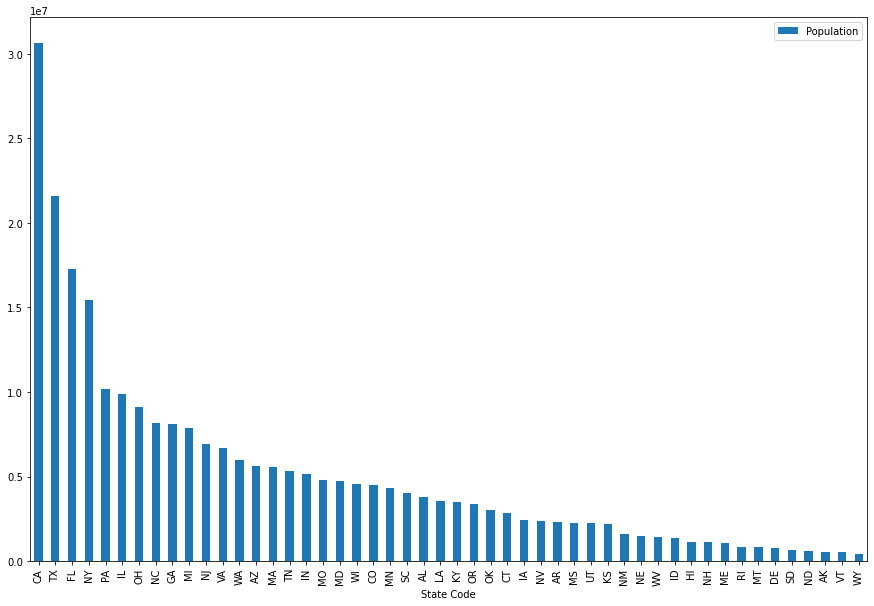

In [72]:
#We create a sorted barchart with the Total poulation sorted from highest average to lowest
StatesData.sort_values(by=['Population'], ascending=False).plot.bar(x='State Code',y='Population', figsize=(15,10))

This bar chart is to show us what the total population is per state so we can account for that in our data analysis down below.

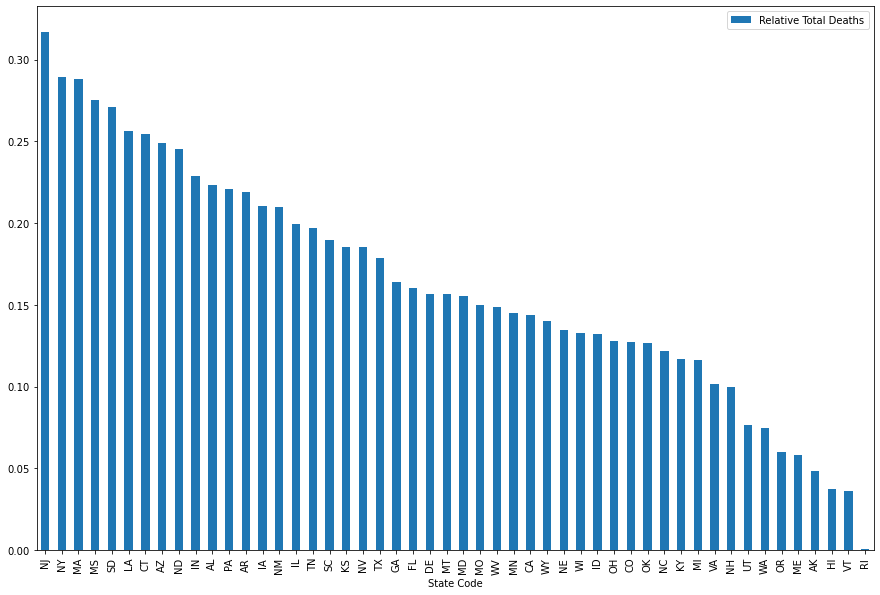

In [73]:
#We create a sorted barchart with the Total deaths sorted from highest average to lowest
StatesData.sort_values(by=['Relative Total Deaths'], ascending=False).plot.bar(x='State Code',y='Relative Total Deaths', figsize=(15,10))

Looking at this barchart of the death rate per state, we can see that the three top states with the most deaths recorded were New Jersey, New York, and Massachusetts. All three of these states have almost .30% of their population confirmed dead due to the Covid-19 virus. Looking at this data, we can see that these states all vary from their population range, but we notice that there can be many other factors that could result in leading to a higher death rate in a specific state. Some other factors that we couldn't account for in our dataset could be the average age in the state or how each state handled the Covid-19 pandemic through their state legislation. This could result in a higher death rate in a state which would be out of scope for this project since some of this data isn't quantifiable. To get a better understanding of this data, we later use a map to visualize this data better to get a better understanding of what trends could be causing these higher death rates in these certain states.

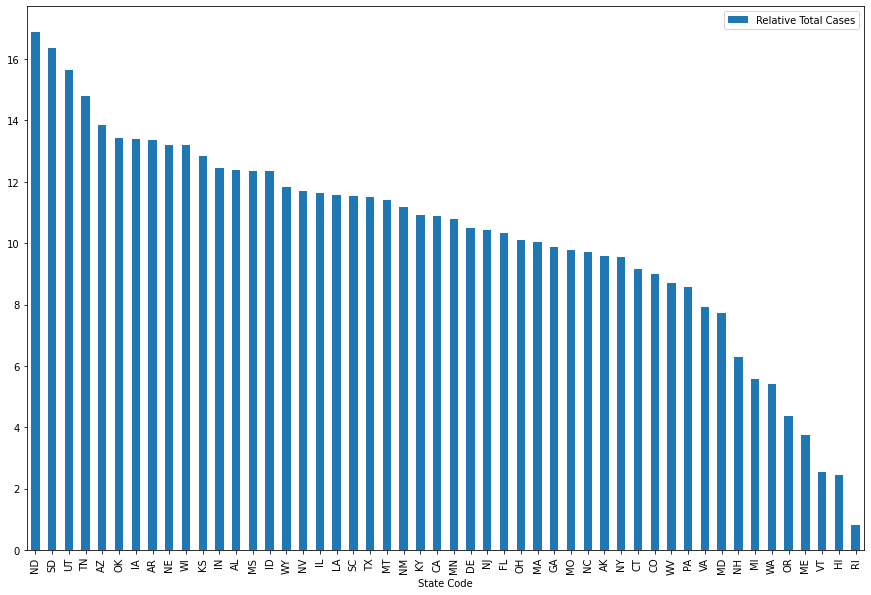

In [74]:
#We create a sorted barchart with the Total cases sorted from highest average to lowest
StatesData.sort_values(by=['Relative Total Cases'], ascending=False).plot.bar(x='State Code',y='Relative Total Cases', figsize=(15,10))

Observing this bar chart, we notice that the top three states with the highest confirmed cases are North Dekota, South Dekota, and Utah. They all range around 15-17% of their population being confirmed positive for Covid-19. This is suprising considering that those three states death rates are not as high compared to the top three states with the highest death rates shown in the other chart before. This could be due to these states having a lower percentage of elderly or could be due to those states offering better health care for those who were infected. Looking at this data through a bar chart still doesn't tell us much though so later on in our analysis we put this data on a map to better visualize it and make a better inference on the information we noticed so that we could answer our research question.


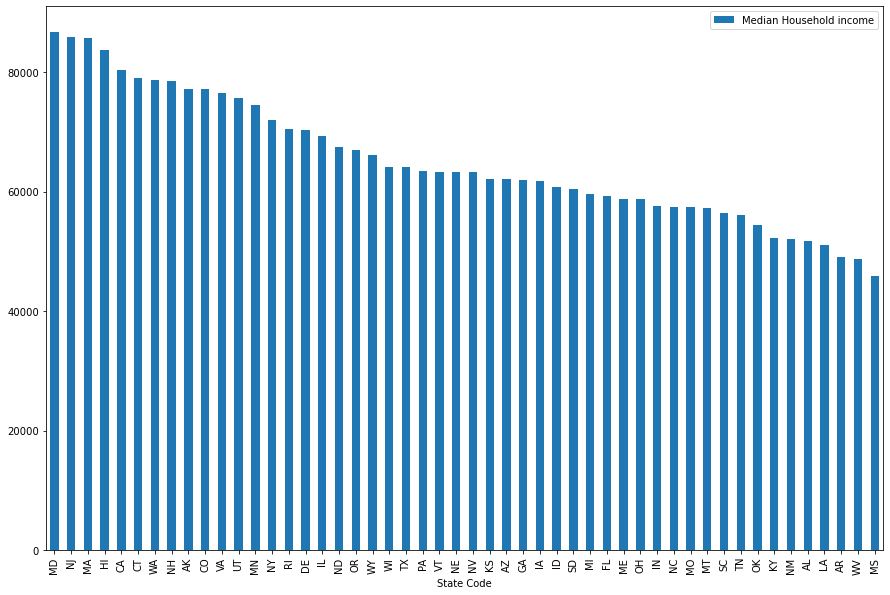

In [75]:
#We create a sorted barchart with the Total cases sorted from highest average to lowest
StatesData.sort_values(by=['Median Household income'], ascending=False).plot.bar(x='State Code',y='Median Household income', figsize=(15,10))

Looking at this bar chart of the median household income per state, we notice that the three states with the highest income are Maryland, New Jersey, and Massachusetts. With this in mind, one trend that immediately pops out to us is that these three states are in the lower half of the confirmed cases per state dataset. While this does seem like something that could correlate to our hypothesis, we have to consider other outside factors that could contribute to a state having a higher infection rate or death rate. Another factor that we have to account for is that we have to keep in mind that this data displayed in this bar chart is representative of the state as a whole, which in itself doesn't tell us very much. We should note that county level data is extremly hard to chart using a bar chart so we will be using a geographical map to visualize this data to make it easier to understand.  We plan to further analyize this data through a county level analysis to get a better understanding of the trends so we can make a well informed inference based off of this data to develop a conclusion to our research question. 


In [76]:
#First we make the map that contains the total deaths per state so we can see the effect state level
toPlot = dict(type='choropleth', locations= StatesData['State Code'], locationmode = 'USA-states', colorscale = 'ylgnbu', autocolorscale = False, text = StatesData['State'], z = StatesData['Relative Total Deaths'], colorbar = {'title': "Relative Total Deaths"})

In [77]:
#Next we assign the visual aspects and details of the map
layout = dict(title = 'Total Deaths in the USA Map by state', geo = dict(scope='usa'))

In [78]:
#Finally we create the map and display the map
#This code is commented out to prevent display issues when running in github. 
#(note we still provide an image of the map below)
choromap = go.Figure(data = [toPlot], layout = layout)
iplot(choromap)

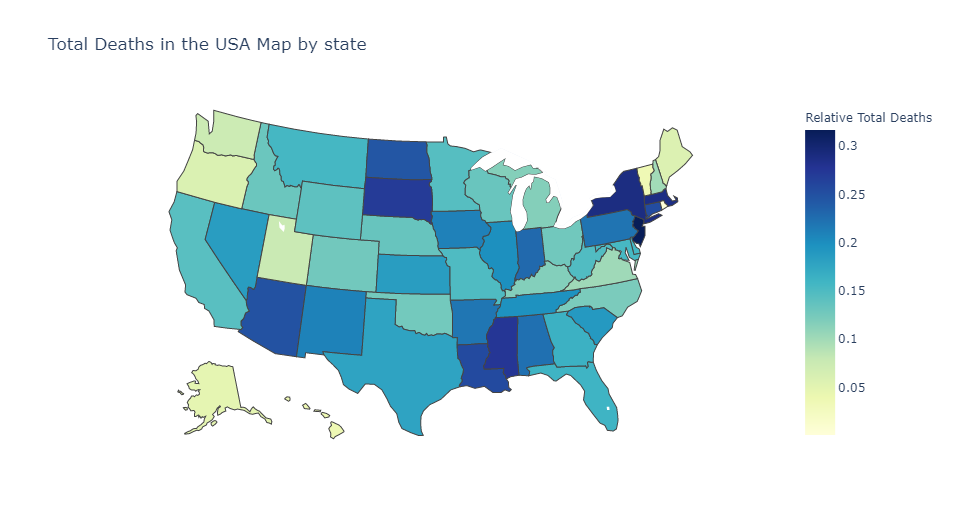

In [79]:
#We included a copy of the image just in case it didn't render in github
pil_im = Image.open('Copyofmaps/StateDeaths.png')
display(pil_im.resize((int(pil_im.size[0]),int(pil_im.size[1])), 0) )


Looking at this geographical map of the U.S. which represents the percentage of deaths per state based on their population, we notice that the states with the heighest death rates were in New Jersey, New York, Massachusetts, South Dekota, and Mississippi. 

Looking at these states with the heighest death rates, we notice that New Jersey, New York, and Massachusetts are all right next to each other and all have very large population rates. We could consider that these states have a higher chance at spreading due to their close proximity and could be the result of more deaths being caused. We also have to consider the fact that as mentioned earlier, these states could have a much higher percentage of their population being of indivuduals over the age of 65 years. Unfortunately, due to the scope and limitations of this project, we couldn't consider all of these factors into our data set due to the high number of variables we would have to account for but we do still want to consider those factors as a possible reson as to why these states have such a high death rate. Interestingly, we notice that South Dekota and Mississippi are both states far from New Jersey, New York and Massachusetts and yet still have higher then average death rates. With this in mind, we want to consider the number of confirmed cases per state, such that we can see if there is a correlation between the number of deaths and the number of confirmed cases. 

In [80]:
#Next we make the map that contains the total cases per state so we can see the effect state level
toPlotCases = dict(type='choropleth', locations= StatesData['State Code'], locationmode = 'USA-states', colorscale = 'tempo', autocolorscale = False, text = StatesData['State'], z = StatesData['Relative Total Cases'], colorbar = {'title': "Relative Total Cases"})

In [81]:
#Next we assign the visual aspects and details of the map
layoutCases = dict(title = 'Total Cases in the USA Map by state', geo = dict(scope='usa'))

In [82]:
#Finally we create the map and display the map 
#This code is commented out to prevent display issues when running in github. 
#(note we still provide an image of the map below)
#choromapCases = go.Figure(data = [toPlotCases], layout = layoutCases)
#iplot(choromapCases)

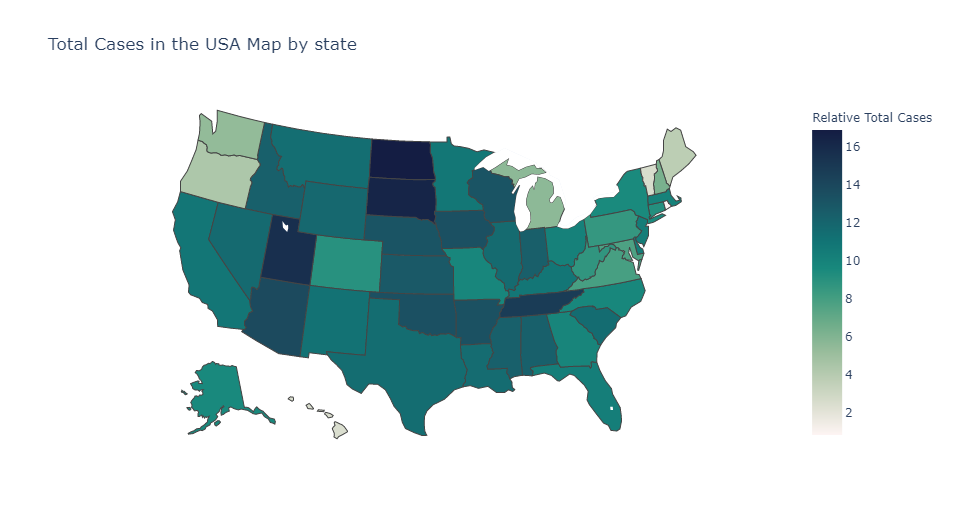

In [83]:
#We included a copy of the image just in case it didn't render in github
pil_im = Image.open('Copyofmaps/StateCases.png')
display(pil_im.resize((int(pil_im.size[0]),int(pil_im.size[1])), 0) )


Looking at this map of the number of confirmed cases per state in the U.S., we notice that four states immediately stand out as the states with the highest percentage of their population being infected with the Covid-19 virus. Those states are North Dekota, South Dekota, Utah, and Tennessee. Oddly, only one of these states, South Dekota, were amoung the states with the heighest death rates by state. This tells us that the number of infections doesn't directly correlate with an increased number of deaths. For example, take note of Utah, which had 15.6% of their population be infected with Covid-19 based on their population. When looking at Utahs death rate, we notice it was .07% which is significantly much lower then when we compare New Jerseys death rate which was the heighest .31% with 10% of their total population reporting confirmed cases of Covid-19. This tells us that there are other factors coming into play which may lead to why there is a heigher death rate for some States compared to others. 

We also notice that most of the states with the heighest confirmed cases were in the center part of the United States. There could be a number of reasons as to why this is the case, such as having much more relaxed legislation allowing their citizens to spread the virus at a much faster rate than other states. Other factors that could result in this could be that a states population has a much lower immune system or could result in other variables that we couldn't turn into quantifiable data for the scope of this project. One factor that we are planning to account for is the median income level per household on average by state which we will analyze in the next map.

In [84]:
#Next we make the map that contains medianm household income per state 
toPlotIncome = dict(type='choropleth', locations= StatesData['State Code'], locationmode = 'USA-states', colorscale = 'greens', autocolorscale = False, text = StatesData['State'], z = StatesData['Median Household income'].astype(int), colorbar = {'title': "Income Level"})

In [85]:
#Next we assign the visual aspects and details of the map
layoutIncome = dict(title = 'Median Household Income by State', geo = dict(scope='usa'))

In [86]:
#Finally we create the map and display the map
#This code is commented out to prevent display issues when running in github. 
#(note we still provide an image of the map below)
#choromapCases = go.Figure(data = [toPlotIncome], layout = layoutIncome)
#iplot(choromapCases)

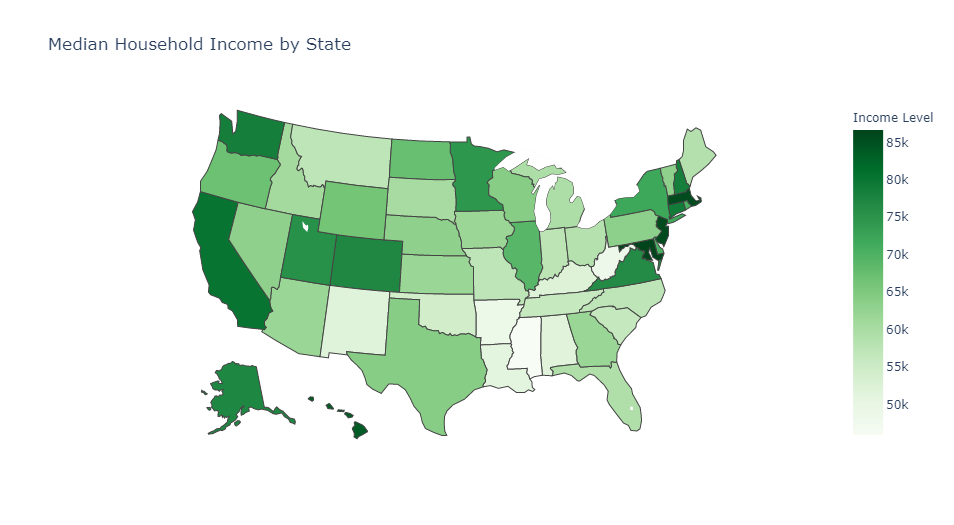

In [87]:
#We included a copy of the image just in case it didn't render in github
pil_im = Image.open('Copyofmaps/StateIncome.png')
display(pil_im.resize((int(pil_im.size[0]),int(pil_im.size[1])), 0) )


After generating the map that displays the median household income per state in the U.S., we notice that the states with the heighest income are California, Washington, Maryland, Hawaii, Colorado ,Connecticut, New Jersey, and Massachusetts. 

What is interesting about this is that none of the states with the highest confirmed cases in the U.S. are among this list. We should note that New Jersey and Massachusetts did have a high death percentage but as we explained earlier there could be other factors that come into play when it came to what caused such a high death rate. Another trend we noticed is that the states with the highest income rates seemed to have a lower rate of infection when comparing it to the map of confirmed cases by state. This trend is overall generalized by state so we want to consider more accurate data by looking at each state by its county level and observing its trends as displayed below.

In [88]:
#We assign the fips column of our county dataset to help our map generate percicely. 
fips = CountyData['countyFIPS'].tolist()

In [89]:
#We select the type of data we plan to visualize from our dataset. 
values = CountyData['Relative Total Deaths'].tolist()

In [90]:
#We use a blue color scale with different oppacity to help 
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(0, 1, len(colorscale) - 1))

In [91]:
#Finally we generate the map
fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Total Deaths in the USA',
    legend_title='Total Deaths'
)

In [92]:
#Here we display the geographical Map.
#This code is commented out to prevent display issues when running in github. 
#(note we still provide an image of the map below)
#fig.layout.template = None
#fig.show()

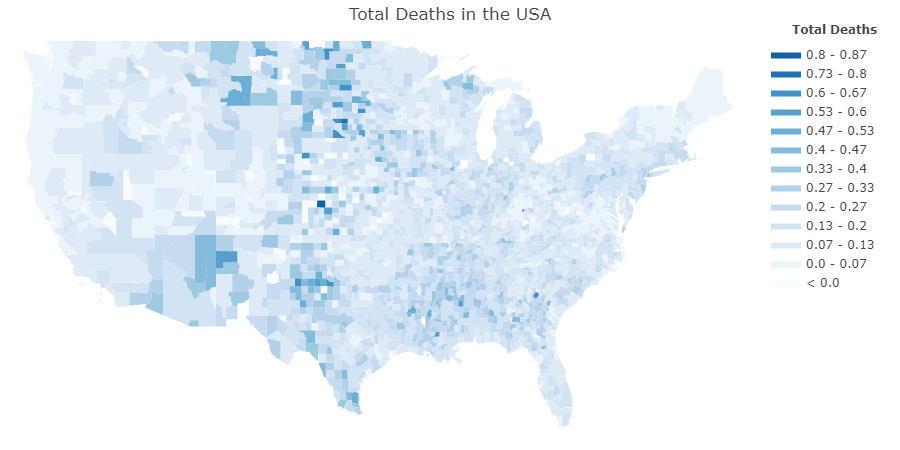

In [93]:
#We included a copy of the image just in case it didn't render in github
pil_im = Image.open('Copyofmaps/CountyDeaths.png')
display(pil_im.resize((int(pil_im.size[0]),int(pil_im.size[1])), 0) )


One of the first things we noticed when looking at the data is that most of the highest death rates per county in the U.S. seem to be concentrated in the counties within the center of the U.S. This is interesting since most of these counties are mainly agricultural areas with much lower populations and have a much older avearage age per their population. Some other factors that could come into play in determining the number of deaths such as how each county was handling the Covid-19 pandemic but unfortunately, these variables were pushing our projects limitations so we couldn't consider them when looking at this data, but we do keep them in mind when making observations on what we notice.

What's interesting about this data is that the counties with the heighest death rates by county wern't shown when looking at this from a states perspective. This tells us that most of the county data was being averaged out bluring out which counties in specific were the hotspots for the number of deaths caused by Covid-19. Having a clear view of county level data allows us to clearly notice these trends.

In [94]:
#We select the type of data we plan to visualize from our dataset. 
values = CountyData['Relative Total Cases'].tolist()

In [95]:
#We use a blue color scale with different oppacity to help 
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 33.67, len(colorscale) - 1))

In [96]:
#Finally we generate the map
fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=False, centroid_marker={'opacity': 0},
    asp=2.9, title='Total Cases Percentage in the USA',
    legend_title='Total Cases Percentage'
)

In [97]:
#Here we display the geographical Map.
#This code is commented out to prevent display issues when running in github. 
#(note we still provide an image of the map below)
#fig.layout.template = None
#fig.show()

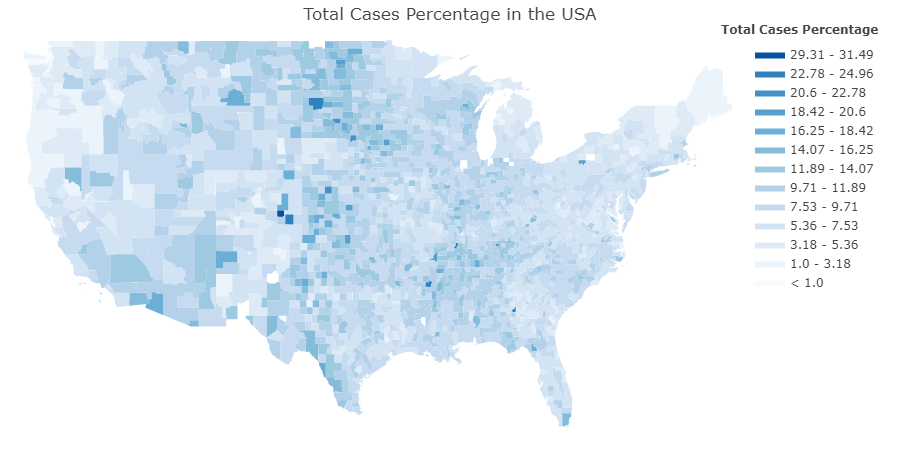

In [98]:
#We included a copy of the image just in case it didn't render in github
pil_im = Image.open('Copyofmaps/CountyCases.png')
display(pil_im.resize((int(pil_im.size[0]),int(pil_im.size[1])), 0) )


Similar to our deaths county data set, we notice that the number of active cases seems to be mostly concentrated around the center of the U.S. map. This follows our last data set which displayed the deaths percentage by population per county in the U.S. which also generalized most of the hot spots around the center of the U.S. this contradicts our observation we noted earlier when we were making observations about the data state level. What we notice is that there is a direct correlation by the number of cases and the death rate that would positively correspond to it. 

We should also note that the number of confirmed cases was most generalized around the center of the U.S. but there are a few outliers scattered around the U.S. It is important, when making observations about this data, that we consider outside factors and what could result in these higher number of cases in these specific counties. One factor that we couldn't include in our dataset as noted before, which could have changed our observations is the average age by county. While this data would be nice to have along side, it is difficult to be able to account for all factors with such a limited time frame and limited resources so we will have to simply consider it when we are making final observations. We also have to keep in mind that each state and county handled the Covid-19 pandemic differently and because of that there could be an increase or decrease in the number of cases so we will have to simply consider that as an uncontrolled variable since that data is very difficult to quantify and is unfortunately out of scope for the level of this project

In [99]:
#We select the type of data we plan to visualize from our dataset. 
values = CountyData['Median Household income'].tolist()

In [100]:
#We use a blue color scale with different oppacity to help 
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 100000, len(colorscale) - 1))

In [101]:
#Finally we generate the map
fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Median Household income by county in the USA',
    legend_title='Median Household income $'
)

In [102]:
#Here we display the geographical Map.
#This code is commented out to prevent display issues when running in github. 
#(note we still provide an image of the map below)
#fig.layout.template = None
#fig.show()

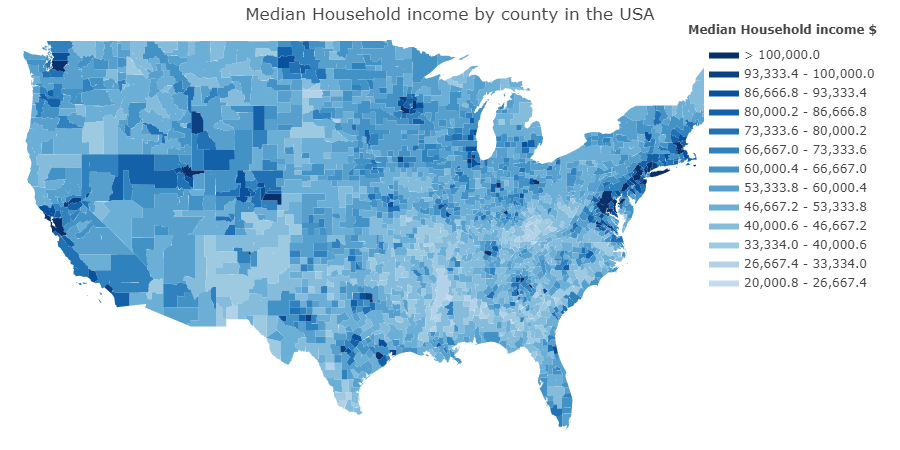

In [103]:
#We included a copy of the image just in case it didn't render in github
pil_im = Image.open('Copyofmaps/MedianHousehold.png')
display(pil_im.resize((int(pil_im.size[0]),int(pil_im.size[1])), 0) )


In this map, we observe the median household income by county in the U.S. and immediately, we notice that the counties with the highest median household income level are counties that are located in the areas with highly populated cities, to name a few San Fransisco, San Diego, or New York City. However, looking at our other datasets, deaths and confirmed cases per county, we notice that these counties with high median household income rates are also the counties with the lowest number of cases and deaths. This is interesting because looking at this data from a state level, we aren't able to detect these important trends. This allows us to notice a negative correation between income and confirmed cases by county. This allows us to make our first observations that could answer our research question, which was weather income has an effect on the likelyhood of contracting Covid-19 and the overall lethality. 

Looking only at this data, we can see that income does have an effect on the likelyhood of contracting Covid-19 and an effect on the overall lethality. From our data we have presented so far, we notice that the higher the median household income is in a county, the lower the confirmed cases are and the lower the death percentage is by county. We still have to consider outside factors we have previously mentioned such as age and legislation but from the data we have presented so far we can see these trends begin to emerge.  

With this data, we now can begin to take a more analytical approach to be able to support or refuse our hypothesis that we presented at the beginning of this project.

In [104]:
#PLEASE ADD INFERENCE ANALYSIS HERE

# Ethics & Privacy

**NEEDS TO BE UPDATED**

The Question
- Our research aims to answer whether income level of a county in the U.S. affects the likelihood of contracting the Covid-19 virus.
- We are still living in the Covid-19 pandemic currently. It has been almost a year since the outbreak, and we believe that - we have quite a good understanding about the context and background of our question.
- We restrict our scope of investigation to county-level changes of Covid-19 confirmed cases. We might be inadvertently tracking the health status of an individual if a county has a very small population. However, this shouldn't be a major concern because even the smallest county in the U.S., Arlington County, Virginia, has a population of approximately 236,842 citizens, which makes individual tracking extremely unlikely

The Implications
- Our professor, TAs and ourselves are the stakeholders. Since our project would be a large scale analysis, we believe that there won't be any affect to them.
- It is possible that our conclusion (the information we gain) could be co-opted for nefarious purposes. For example, if we do eventually prove that higher-income groups usually have a lower covid contracting rate, some might falsely interpretate the statement saying that most lower-income groups have Covid-19. This can lead to discriminations against disadvantaged groups.
- It is possible for us to protect them from the misuse of our research conclusion. If we state our conclusion more carefully, and accurately, such misinformation could be prevented.

The Data
- There are quite a few datasets available. They are listed in the Data section.
- This data has been downloaded from either government websites or trusted research institutes such as the CDC.
- We think the data we have is more than enough for us to have reliable inferences, as both aspects (income distribution and Covid cases) are well studied areas

Informed Consent
- We are not able to obtain informed consent from the participants, because even ourselves don't know who our research participants are. As far as we know, both Covid confirmed cases and income statistics are anonymized data.

Privacy
- Privacy it almost guaranteed in our research, because, again, our analysis would be mostly based on large-scale anonymized data.
- The data we obtained is anonymized, so no further actions is required.

Evaluation
- We would evaluate the project based on data and calculate its statistical significance.

Analysis
- Our analysis is subject to spurious correlations. For example, the number of confirmed cases are those that are reported. However, the real Covid contraction numbers remain unknown.
- We would be tracking the number of daily testing performed and macro economy fluctuations.

Transparency & Appeal
- Our model is pretty straightforward as normal statistical inference. So no black box here.
- There are multiple ways to appeal our model decision, of course. For example, we may find out the daily confirmed cases data being faulty, or not directly related to the infection rate in a community.

Continuous Monitoring
- We would be continuously monitoring & updating the data as we conduct our research. For those unintended side effects mentioned above, we would also be monitoring it closely.

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*